**Aruco Mapping**-
Check the centre of the screen and bring the robot over there. Note the coordinates. While doing this, make sure that the x,y coordinates of the robot matches that of the camera.

Screen Center (origin): (960, 540)


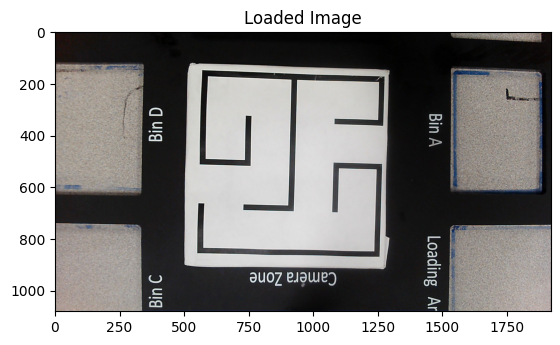

No markers detected.


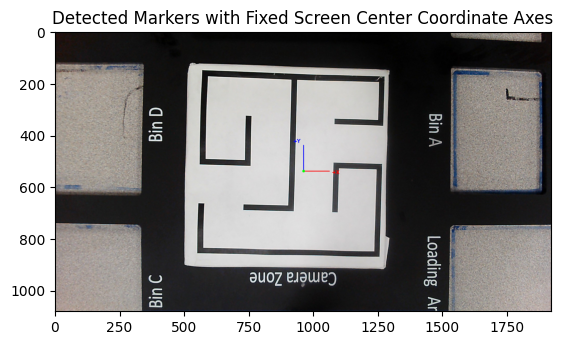

Output image saved as 'wes_with_screen_center_axes.jpg'.


 {}


In [ ]:
# Install the required package if not already installed

import cv2
import numpy as np
import cv2.aruco as aruco
import matplotlib.pyplot as plt

# Load the image
image_path = 'maze.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Failed to load image. Check the path.")
    exit()

# Get the dimensions of the image
image_height, image_width = image.shape[:2]

# Define the center of the screen as the origin
origin_x = image_width // 2
origin_y = image_height // 2
origin = (origin_x, origin_y)

print(f"Screen Center (origin): {origin}")

# Display the loaded image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Loaded Image")
plt.show()

# Known physical distance between markers in millimeters
D_actual = 171.39  # Known distance between markers in mm

# Initialize the ArUco dictionary and detector parameters
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters()

# Create ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

# Convert to grayscale and detect markers
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
corners, ids, _ = detector.detectMarkers(gray)

# Draw the coordinate axes centered at the screen center
axis_length_px = 100  # Length of the axes in pixels

# Positive X-axis (to the right)
x_axis_endpoint_pos = (origin_x + axis_length_px, origin_y)
# Positive Y-axis (vertically upward)
y_axis_endpoint_pos = (origin_x, origin_y - axis_length_px)

# Draw the X-axis
cv2.line(image, origin, x_axis_endpoint_pos, (0, 0, 255), 2)  # Red for +X-axis

# Draw the Y-axis
cv2.line(image, origin, y_axis_endpoint_pos, (255, 0, 0), 2)  # Blue for +Y-axis

# Label the axes
cv2.putText(image, '+X', (x_axis_endpoint_pos[0] + 10, x_axis_endpoint_pos[1] + 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
cv2.putText(image, '+Y', (y_axis_endpoint_pos[0] - 40, y_axis_endpoint_pos[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Draw the origin point
cv2.circle(image, origin, radius=5, color=(0, 255, 0), thickness=-1)  # Green dot at the origin

# Check if markers are detected
marker_positions = {}
if ids is not None:
    print(f"Detected marker IDs: {ids.flatten()}")

    for i, corner in zip(ids.flatten(), corners):
        # Calculate the center of the marker
        center_x = int(np.mean(corner[0][:, 0]))
        center_y = int(np.mean(corner[0][:, 1]))

        # Store marker ID and its pixel coordinates

        # Convert marker coordinates relative to the screen center
        rel_x = center_x - origin_x  # Positive X is rightward
        rel_y = -(center_y - origin_y)  # Positive Y is upward
        marker_positions[i] = (rel_x, rel_y)
        print(f"Marker {i}: Relative Coordinates (x: {rel_x}px, y: {rel_y}px)")

    # Draw detected markers
    aruco.drawDetectedMarkers(image, corners, ids)
else:
    print("No markers detected.")

# Show the final image with axes and markers
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Markers with Fixed Screen Center Coordinate Axes")
plt.show()

# Optionally save the output image
output_path = 'wes_with_screen_center_axes.jpg'
cv2.imwrite(output_path, image)
print(f"Output image saved as '{output_path}'.")

# Print marker positions
print("\n\n", marker_positions)


In [ ]:
# Define a function to input x and y coordinates
def input_coordinates():
    coordinates = []  # List to store coordinates as tuples (x, y)
    print("Enter coordinates one by one (x, y). Type 'done' to finish.")

    while True:
        try:
            # Ask the user for input
            user_input = input("Enter x and y separated by a space (or 'done' to finish): ").strip()

            # Exit condition
            if user_input.lower() == "done":
                break

            # Parse the input into x and y values
            x, y = map(float, user_input.split())
            coordinates.append((x, y))  # Add the tuple to the list

        except ValueError:
            print("Invalid input. Please enter two numbers separated by a space, or 'done' to finish.")

    return coordinates

# Call the function to get the coordinates
stored_coordinates = input_coordinates()

# Display the stored coordinates
print("\nStored Coordinates:")
for idx, (x, y) in enumerate(stored_coordinates, start=1):
    print(f"Point {idx}: x = {x}, y = {y}")


Enter coordinates one by one (x, y). Type 'done' to finish.
Enter x and y separated by a space (or 'done' to finish): -359 -83
Enter x and y separated by a space (or 'done' to finish): 436 77
Enter x and y separated by a space (or 'done' to finish): done

Stored Coordinates:
Point 1: x = -359.0, y = -83.0
Point 2: x = 436.0, y = 77.0


In [ ]:
import cv2
import numpy as np


origin=(-408,-373)


# Known length in mm and its corresponding length in pixels
known_length_mm = 160.44  # Replace with the actual length in mm
known_length_pixels = 798.44  # Replace with the length measured in pixels

# Calculate the scale
scale_mm_per_pixel = known_length_mm / known_length_pixels

# Define two sets of pixel coordinates to convert

keys = list(marker_positions.keys())  # Get a list of keys

pixel_coords_1 = marker_positions[keys[0]]  # Value of the first key
pixel_coords_2 = marker_positions[keys[1]]  # Value of the second key


# Convert both coordinates to millimeters
mm_coords_1 = (pixel_coords_1[0] * scale_mm_per_pixel, pixel_coords_1[1] * scale_mm_per_pixel)
mm_coords_2 = (pixel_coords_2[0] * scale_mm_per_pixel, pixel_coords_2[1] * scale_mm_per_pixel)

# Store the results in a dictionary
coordinates_dict = {
    "Point 1": {"Pixel": pixel_coords_1, "Millimeters": mm_coords_1},
    "Point 2": {"Pixel": pixel_coords_2, "Millimeters": mm_coords_2}
}

# Print the dictionary
print("Coordinates Dictionary:")
# Known length in mm and its corresponding length in pixels
known_length_mm = 160.44  # Replace with the actual length in mm
known_length_pixels = 798.44  # Replace with the length measured in pixels

# Calculate the scale
scale_mm_per_pixel = known_length_mm / known_length_pixels

# Define two sets of pixel coordinates to convert

print(coordinates_dict)
# Add the additional x and y values to each point in the dictionary
for point, data in coordinates_dict.items():
    print(f"{point}:")
    print(f"  Pixel Coordinates: {data['Pixel']}")
    print(f"  Millimeter Coordinates: {data['Millimeters']}")

    # Compute robot coordinates
    updated_mm_coords = (
        origin[0] + data['Millimeters'][0],  # Add origin to x-coordinate
        origin[1] + data['Millimeters'][1]  # Add origin to y-coordinate
    )
    print(f"  Robot Coordinates: {updated_mm_coords}")


Coordinates Dictionary:
{'Point 1': {'Pixel': (436, 77), 'Millimeters': (87.61064074946144, 15.472521416762685)}, 'Point 2': {'Pixel': (-359, -83), 'Millimeters': (-72.13811933269875, -16.678172436250687)}}
Point 1:
  Pixel Coordinates: (436, 77)
  Millimeter Coordinates: (87.61064074946144, 15.472521416762685)
  Robot Coordinates: (-320.3893592505386, -357.5274785832373)
Point 2:
  Pixel Coordinates: (-359, -83)
  Millimeter Coordinates: (-72.13811933269875, -16.678172436250687)
  Robot Coordinates: (-480.13811933269875, -389.6781724362507)


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the homogeneous transformation matrices
def H12(t1):
    return np.array([
        [-np.cos(t1), 0, -np.sin(t1), 0],
        [-np.sin(t1), 0, np.cos(t1), 0],
        [0, 1, 0, 210],
        [0, 0, 0, 1]
    ])

def H23(t2):
    return np.array([
        [-np.cos(t2), -np.sin(t2), 0, -250*np.cos(t2)],
        [-np.sin(t2), np.cos(t2), 0, -250*np.sin(t2)],
        [0, 0, -1, 76.2],
        [0, 0, 0, 1]
    ])

def H34(t3):
    return np.array([
        [-np.cos(t3), np.sin(t3), 0, 250*np.cos(t3)],
        [np.sin(t3), np.cos(t3), 0, -250*np.sin(t3)],
        [0, 0, -1, 76.2],
        [0, 0, 0, 1]
    ])

def H45(t4):
    return np.array([
        [-np.cos(t4), 0, np.sin(t4), 0],
        [-np.sin(t4), 0, -np.cos(t4), 0],
        [0, -1, 0, 109.5],
        [0, 0, 0, 1]
    ])

def H56(t5):
    return np.array([
        [np.cos(t5), 0, np.sin(t5), 0],
        [np.sin(t5), 0, -np.cos(t5), 0],
        [0, 1, 0, 107],
        [0, 0, 0, 1]
    ])

def H6e(t6):
    return np.array([
        [np.cos(t6), -np.sin(t6), 0, 0],
        [np.sin(t6), np.cos(t6), 0, 0],
        [0, 0, 1, 76.2],
        [0, 0, 0, 1]
    ])

# Forward kinematics function
def forward_kinematics(angles):
    t1, t2, t3, t4 = angles
    t5, t6 = np.radians(-90), np.radians(0)  # Fixed values
    H = H12(t1) @ H23(t2) @ H34(t3) @ H45(t4) @ H56(t5) @ H6e(t6)
    position = H[:3, 3]  # Extract X, Y, Z
    return position

# Error function for optimization
def error_func(angles, target_position):
    position = forward_kinematics(angles)
    return np.linalg.norm(position - target_position)

# Define the ranges for joint angles
t1_range = np.radians([-160, -120])
t2_range = np.radians([-35, -20])
t3_range = np.radians([30, 80])
t4_range = np.radians([-130, -125])

# Desired end-effector position
X_d, Y_d, Z_d = -280, -389, 80  # Specify your target coordinates
target_position = np.array([X_d, Y_d, Z_d])

# Initial guess (midpoints of the ranges)
initial_guess = [
    np.mean(t1_range),
    np.mean(t2_range),
    np.mean(t3_range),
    np.mean(t4_range)
]

# Bounds for the angles
bounds = [
    (t1_range[0], t1_range[1]),
    (t2_range[0], t2_range[1]),
    (t3_range[0], t3_range[1]),
    (t4_range[0], t4_range[1])
]

# Perform optimization
result = minimize(error_func, initial_guess, args=(target_position,), bounds=bounds, method='SLSQP')

# Extract optimal angles
optimal_angles = result.x
t1_opt, t2_opt, t3_opt, t4_opt = np.degrees(optimal_angles)

# Display results
print("Optimal joint angles (in degrees):")
print(f"t1: {t1_opt:.2f} degrees")
print(f"t2: {t2_opt:.2f} degrees")
print(f"t3: {t3_opt:.2f} degrees")
print(f"t4: {t4_opt:.2f} degrees")
print("t5: -90.00 degrees (fixed)")
print("t6: 0.00 degrees (fixed)")

# Display final position
final_position = forward_kinematics(optimal_angles)
print("\nFinal end-effector position:")
print(f"X: {final_position[0]:.2f}")
print(f"Y: {final_position[1]:.2f}")
print(f"Z: {final_position[2]:.2f}")

print(X_d, Y_d, Z_d)
